<a href="https://colab.research.google.com/github/JonahEdmonds/NILM/blob/main/NILM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import seaborn as sns
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from PIL import Image

In [ ]:
# First attempt - simple CNN


model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),  # ORIGINAL
    tf.keras.layers.MaxPooling2D(2, 2), # ORIGINAL
    #tf.keras.layers.Dropout(0),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), # ORIGINAL
    tf.keras.layers.MaxPooling2D(2,2),  # ORIGINAL
    # tf.keras.layers.Dropout(0.7),
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # ORIGINAL
    tf.keras.layers.MaxPooling2D(2,2),  # ORIGINAL
    #tf.keras.layers.Dropout(0.25),
    
    # The fourth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # ORIGINAL
    # tf.keras.layers.MaxPooling2D(2,2),  # ORIGINAL
    # tf.keras.layers.Dropout(0.5),
    
    # The fifth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # ORIGINAL
    # tf.keras.layers.MaxPooling2D(2,2),  # ORIGINAL
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),  # ORIGINAL

    tf.keras.layers.Dense(512, activation='relu'),   # ORIGINAL
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='softmax'),
    # tf.keras.layers.Dense(1, activation='softmax'),      
    tf.keras.layers.Dense(1, activation='sigmoid')  # ORIGINAL
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy',tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.AUC()])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Final_sets/TV',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=256,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Final_sets/TV',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=256,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='validation')


test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Final_sets/TV_test',  # This is the source directory for test images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=256,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1759 images belonging to 2 classes.
Found 439 images belonging to 2 classes.
Found 462 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // 256,  
      epochs=250,
      verbose=1,
      validation_data = validation_generator,
      validation_steps = validation_generator.samples // 256
      )

Epoch 1/250
6/6 [==============================] - 17s 3s/step - loss: 0.8093 - accuracy: 0.5059 - false_negatives_2: 200.0000 - false_positives_2: 280.4286 - true_negatives_2: 169.1429 - true_positives_2: 314.2857 - auc_2: 0.5067 - val_loss: 0.7586 - val_accuracy: 0.4375 - val_false_negatives_2: 144.0000 - val_false_positives_2: 0.0000e+00 - val_true_negatives_2: 112.0000 - val_true_positives_2: 0.0000e+00 - val_auc_2: 0.4831
Epoch 2/250
6/6 [==============================] - 13s 2s/step - loss: 0.7273 - accuracy: 0.4609 - false_negatives_2: 489.0000 - false_positives_2: 34.8571 - true_negatives_2: 411.1429 - true_positives_2: 38.2857 - auc_2: 0.4890 - val_loss: 0.6862 - val_accuracy: 0.5625 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 112.0000 - val_true_negatives_2: 0.0000e+00 - val_true_positives_2: 144.0000 - val_auc_2: 0.5000
Epoch 3/250
6/6 [==============================] - 13s 2s/step - loss: 0.6939 - accuracy: 0.5364 - false_negatives_2: 0.0000e+00 - false_pos

In [ ]:
 results = model.evaluate(test_generator )  
print("test loss, test acc:", results)

2/2 [==============================] - 3s 1s/step - loss: 0.7992 - accuracy: 0.8290 - false_negatives_2: 41.0000 - false_positives_2: 38.0000 - true_negatives_2: 174.0000 - true_positives_2: 209.0000 - auc_2: 0.8773
test loss, test acc: [0.7991657853126526, 0.8290043473243713, 41.0, 38.0, 174.0, 209.0, 0.8772642612457275]


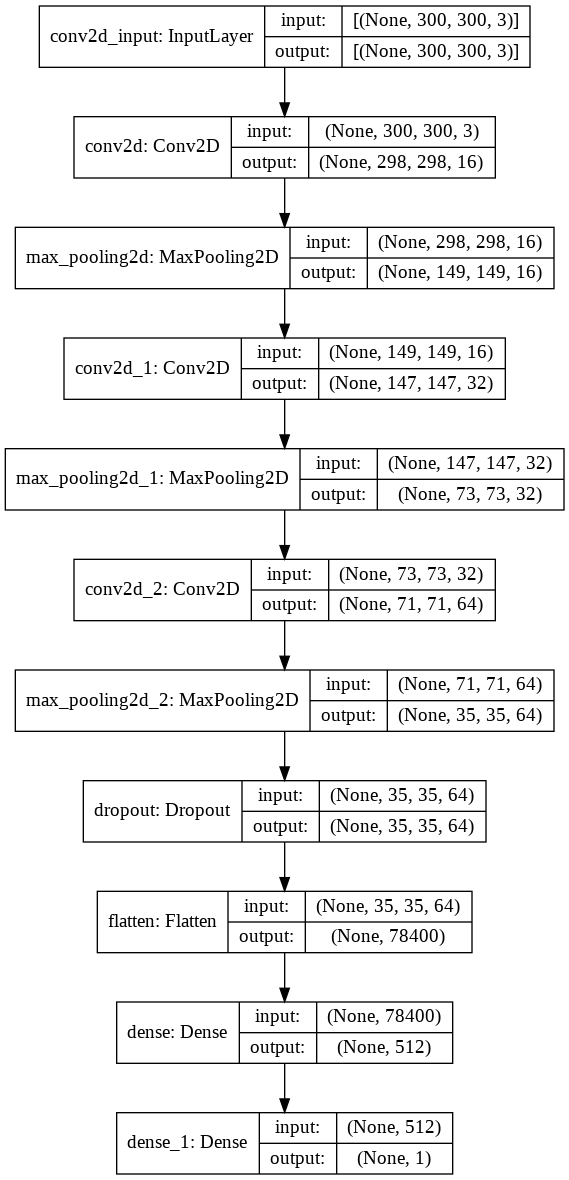

In [ ]:
plot_model(model, show_shapes=True,)


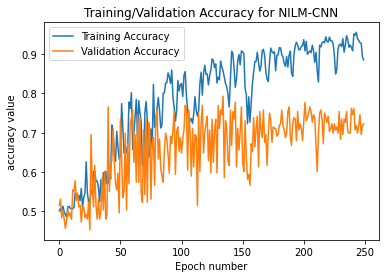

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training/Validation Accuracy for NILM-CNN')
plt.ylabel('accuracy value')
plt.xlabel('Epoch number')
plt.legend(loc="upper left")
plt.savefig('/content/drive/MyDrive/Report Image/model3_fr_ADV_accuracy1.pdf')
plt.show()

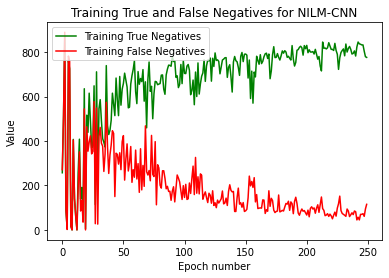

In [ ]:
plt.plot(history.history['true_negatives'],'g', label='Training True Negatives')
plt.plot(history.history['false_negatives'],'r', label='Training False Negatives')
plt.title('Training True and False Negatives for NILM-CNN')
plt.ylabel('Value')
plt.xlabel('Epoch number')
plt.legend(loc="upper left")
plt.savefig('/content/drive/MyDrive/Report Image/model3_fr_ADV_TrainNeg1.pdf')
plt.show()

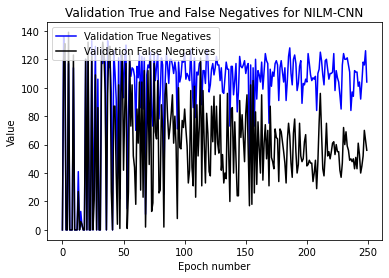

In [ ]:
plt.plot(history.history['val_true_negatives'], 'b' , label='Validation True Negatives')
plt.plot(history.history['val_false_negatives'], 'k' , label='Validation False Negatives')
plt.title('Validation True and False Negatives for NILM-CNN')
plt.ylabel('Value')
plt.xlabel('Epoch number')
plt.legend(loc="upper left")
plt.savefig('/content/drive/MyDrive/Report Image/model3_fr_ADV_ValNeg1.pdf')
plt.show()

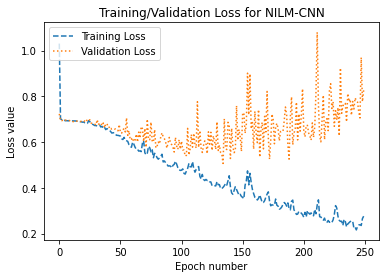

In [ ]:
plt.plot(history.history['loss'],'--', label='Training Loss')
plt.plot(history.history['val_loss'],':', label='Validation Loss')
plt.title('Training/Validation Loss for NILM-CNN')
plt.ylabel('Loss value')
plt.xlabel('Epoch number')
plt.legend(loc="upper left")
plt.savefig('/content/drive/MyDrive/Report Image/model3_fr_ADV_loss1.pdf')
plt.show()

In [ ]:
tf.keras.metrics.AUC()

TypeError: ignored

In [ ]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation='relu', input_shape=(224, 224,3)),
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3),padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3),padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3),padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3),padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3),padding="same", activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3),padding="same", activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3),padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3),padding="same", activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3),padding="same", activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3),padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='softmax'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
     tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Heatmap-Classes-DWasher',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1340 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model1.fit_generator(steps_per_epoch=10,generator=train_generator, epochs=10)